In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%pip install numpy pandas
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        c=1

^C
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   --------- ------------------------------ 2.9/12.6 MB 18.7 MB/s eta 0:00:01
   ------------- -------------------------- 4.2/12.6 MB 21.0 MB/s eta 0:00:01
   --------------- ------------------------ 5.0/12.6 MB 8.6 MB/s eta 0:00:01
   ------------------ --------------------- 5.8/12.6 MB 7.0 MB/s eta 0:00:01
   -------------------- ------------------- 6.3/12.6 MB 6.2 MB/s eta 0:00:02
   -------------------- ------------------- 6.3/12.6 MB 6.2 MB/s eta 0:00:02
   -------------------- ------------------- 6.6/12.6 MB 4.9 MB/s eta 0:00:02
   --------------------- ------------------ 6.8/12.6 MB 4.6 MB/s eta 0:00:02
   ---------------------- ----------------- 7.1/12.6 MB 4.1 MB/s eta 0:00:02
   ------------------------------ --------- 9.7/12.6 MB 4.8 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.6 MB 4.8 MB/s eta 0:00:01
   -------------------------------- ------- 10.2/12.6 MB 4.0 MB/s eta 0:00:01


# Introduction

The dataset contains 4 csv files and one folder with several subfolders, each with a different number of images.

In this Exploratory Data Analysis Notebook we will look to the data, will analyze the content of each csv file, check for missing data, understand the data distribution, see what are the relations between data in various files.

We will also explore the image data, understand how images are indexed in the csv files, if there are articles in the dataset without images. We will also explore image additional information, like image width and height.

We also investigate a very simple baseline model and create an initial submission.



<img src="https://images.unsplash.com/photo-1578983662508-41895226ebfb?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1211&q=80" width=600></img>


# Analysis preparation

We will include here the required packages for reading, parsing, filtering, processing, visualizing the data, both tabular and image.

<img src="https://images.unsplash.com/photo-1607160199580-1b0c9b736b66?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80" width=600></img>


# Read and glimpse the data

<img src="https://images.unsplash.com/photo-1532453288672-3a27e9be9efd?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=764&q=80" width=400></img>

In [11]:
%pip install tqdm matplotlib seaborn  wordcloud pillow
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
from PIL import Image

  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached wordcloud-1.9.3-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 4.2 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/7.8 MB 6.9 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.8 MB 8.4 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 6.8 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 6.2 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/7.8 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.6 MB

Matplotlib is building the font cache; this may take a moment.


In [8]:
print(f"files and folders: {os.listdir('./')}")
print("Subfolders in images folder: ", len(list(os.listdir("./images"))))

files and folders: ['.venv', 'articles.csv', 'customers.csv', 'h-m-personalized-fashion-recommendations.ipynb', 'images', 'sample_submission.csv', 'transactions_train.csv']
Subfolders in images folder:  86


In [14]:
total_folders = total_files = 0
folder_info = []
images_names = []
for base, dirs, files in tqdm(os.walk('./')):
    for directories in dirs:
        folder_info.append((directories, len(os.listdir(os.path.join(base, directories)))))
        total_folders += 1
    for _files in files:
        total_files += 1
        if len(_files.split(".jpg"))==2:
            images_names.append(_files.split(".jpg")[0])

1578it [00:03, 439.31it/s]


In [15]:
print(f"Total number of folders: {total_folders}\nTotal number of files: {total_files}")
folder_info_df = pd.DataFrame(folder_info, columns=["folder", "files count"])
folder_info_df.sort_values(["files count"], ascending=False).head()

Total number of folders: 1577
Total number of files: 119567


folder  files count
1550    069         4187
1554    073         3438
1543    062         3361
1549    068         3313
1551    070         3309

In [16]:
print("folder names: ", list(folder_info_df.folder.unique()))

folder names:  ['.venv', 'images', 'Include', 'Lib', 'Scripts', 'share', 'site-packages', 'adodbapi', 'asttokens', 'asttokens-2.4.1.dist-info', 'colorama', 'colorama-0.4.6.dist-info', 'comm', 'comm-0.2.2.dist-info', 'contourpy', 'contourpy-1.3.0.dist-info', 'cycler', 'cycler-0.12.1.dist-info', 'dateutil', 'debugpy', 'debugpy-1.8.5.dist-info', 'decorator-5.1.1.dist-info', 'executing', 'executing-2.1.0.dist-info', 'fontTools', 'fonttools-4.53.1.dist-info', 'ipykernel', 'ipykernel-6.29.5.dist-info', 'IPython', 'ipython-8.27.0.dist-info', 'isapi', 'jedi', 'jedi-0.19.1.dist-info', 'jupyter_client', 'jupyter_client-8.6.3.dist-info', 'jupyter_core', 'jupyter_core-5.7.2.dist-info', 'kiwisolver', 'kiwisolver-1.4.7.dist-info', 'matplotlib', 'matplotlib-3.9.2.dist-info', 'matplotlib_inline', 'matplotlib_inline-0.1.7.dist-info', 'mpl_toolkits', 'nest_asyncio-1.6.0.dist-info', 'numpy', 'numpy-2.1.1.dist-info', 'numpy.libs', 'packaging', 'packaging-24.1.dist-info', 'pandas', 'pandas-2.2.3.dist-info'

In [18]:
articles_df = pd.read_csv("./articles.csv")
customers_df = pd.read_csv("./customers.csv")
sample_submission_df = pd.read_csv("./sample_submission.csv")

In [20]:
transactions_train_df = pd.read_csv("./transactions_train.csv")

In [21]:
articles_df.head()

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

In [22]:
customers_df.head()

customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [23]:
sample_submission_df.head()

customer_id  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   

                                          prediction  
0  0706016001 0706016002 0372860001 0610776002 07...  
1  0706016001 0706016002 0372860001 0610776002 07...  
2  0706016001 0706016002 0372860001 0610776002 07...  
3  0706016001 0706016002 0372860001 0610776002 07...  
4  0706016001 0706016002 0372860001 0610776002 07...

In [24]:
transactions_train_df.head()

t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

# Let's look closer to the data

<img src="https://images.unsplash.com/photo-1569484221992-2a453658fff3?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1179&q=80" width=600></img>

There are 3 main tables:
- articles - contains informations about each article (like product code, name, product group code, name ...)    
- customers - contains informations about each customer (fidelity card membership, age, postal code)
- transactions (train)  

Transactions have `customer_id` and `article_id`, which are foreign keys for the customer and articles tables.
Beside this, transaction also contains `sales_channel_id`.

In [25]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [26]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In [27]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [28]:
missing_data(articles_df)

Total   Percent
detail_desc                     416  0.394156
product_code                      0  0.000000
prod_name                         0  0.000000
product_type_no                   0  0.000000
product_type_name                 0  0.000000
product_group_name                0  0.000000
graphical_appearance_no           0  0.000000
graphical_appearance_name         0  0.000000
article_id                        0  0.000000
colour_group_code                 0  0.000000
colour_group_name                 0  0.000000
perceived_colour_value_name       0  0.000000
perceived_colour_value_id         0  0.000000
perceived_colour_master_name      0  0.000000
department_no                     0  0.000000
department_name                   0  0.000000
perceived_colour_master_id        0  0.000000
index_code                        0  0.000000
index_name                        0  0.000000
index_group_name                  0  0.000000
index_group_no                    0  0.000000
section_no                        0  0.000000
section_name                      0  0.000000
garment_group_no                  0  0.000000
garment_group_name                0  0.000000

In [29]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [30]:
missing_data(customers_df)

Total    Percent
Active                  907576  66.150819
FN                      895050  65.237831
fashion_news_frequency   16011   1.167000
age                      15861   1.156066
club_member_status        6062   0.441843
customer_id                  0   0.000000
postal_code                  0   0.000000

In [31]:
sample_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   customer_id  1371980 non-null  object
 1   prediction   1371980 non-null  object
dtypes: object(2)
memory usage: 20.9+ MB


In [32]:
transactions_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [33]:
missing_data(transactions_train_df)

Total  Percent
t_dat                 0      0.0
customer_id           0      0.0
article_id            0      0.0
price                 0      0.0
sales_channel_id      0      0.0

In [34]:
## Unique values

In [35]:
unique_values(articles_df)

Total  Uniques
article_id                    105542   105542
product_code                  105542    47224
prod_name                     105542    45875
product_type_no               105542      132
product_type_name             105542      131
product_group_name            105542       19
graphical_appearance_no       105542       30
graphical_appearance_name     105542       30
colour_group_code             105542       50
colour_group_name             105542       50
perceived_colour_value_id     105542        8
perceived_colour_value_name   105542        8
perceived_colour_master_id    105542       20
perceived_colour_master_name  105542       20
department_no                 105542      299
department_name               105542      250
index_code                    105542       10
index_name                    105542       10
index_group_no                105542        5
index_group_name              105542        5
section_no                    105542       57
section_name                  105542       56
garment_group_no              105542       21
garment_group_name            105542       21
detail_desc                   105126    43404

We observe that features for which we expect to have the same number of unique value, like:
* product_type_no and product_type_name,  
* departmant_no and department_name,  
* section_no and section_name 
have different number of unique values, which might means that we might have categories with same name.
Others, like:
* index_code and index_name,
* garment_group_no and garment_group_name
have the same number of unique values.

In [36]:
unique_values(customers_df)

Total  Uniques
customer_id             1371980  1371980
FN                       476930        1
Active                   464404        1
club_member_status      1365918        3
fashion_news_frequency  1355969        3
age                     1356119       84
postal_code             1371980   352899

In [37]:
unique_values(transactions_train_df)

Total  Uniques
t_dat             31788324      734
customer_id       31788324  1362281
article_id        31788324   104547
price             31788324     9857
sales_channel_id  31788324        2

We observe that not all the customers in customer data appears as having transactions in transaction train data. As well, not all articles are represented in this data. It is interesting that the number of different prices is quite small, out of 31.7M transactions, and for 1.3M customers, buying 104K different articles. Same for the dates, there are only 734 different dates. Let's check some stats here.

In [38]:
print(f"Percent of articles present in transactions: {round(104547/105542,3)*100}%")
print(f"Percent of articles present in transactions: {round(1362281/1371980,3)*100}%")

Percent of articles present in transactions: 99.1%
Percent of articles present in transactions: 99.3%


# Articles data

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\821971497.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


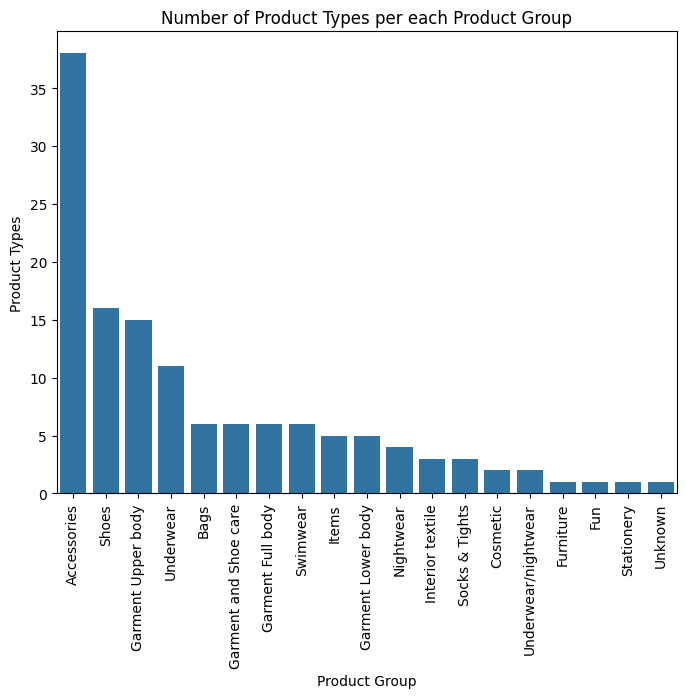

In [39]:
temp = articles_df.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df = df.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Product Types per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Product Types", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [40]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

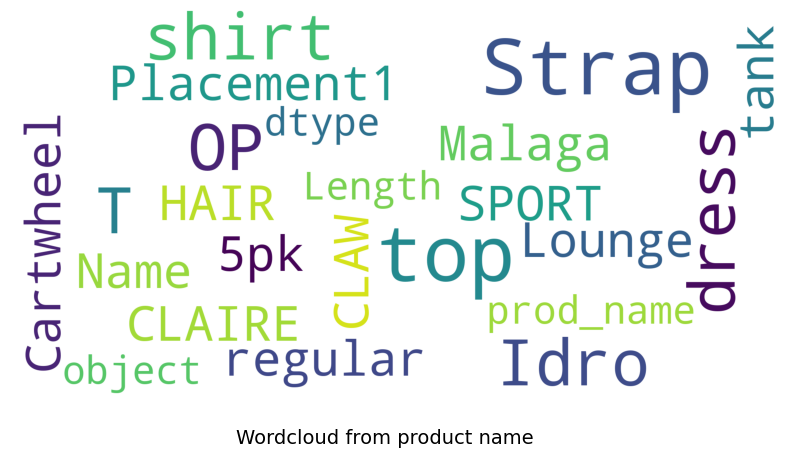

In [41]:
show_wordcloud(articles_df["prod_name"], "Wordcloud from product name")

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\3207028507.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


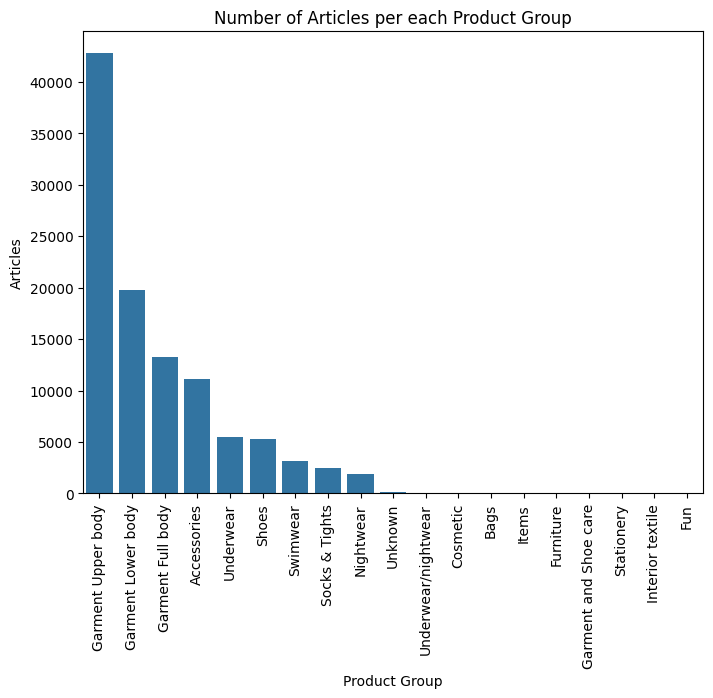

In [42]:
temp = articles_df.groupby(["product_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Articles per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\647202512.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


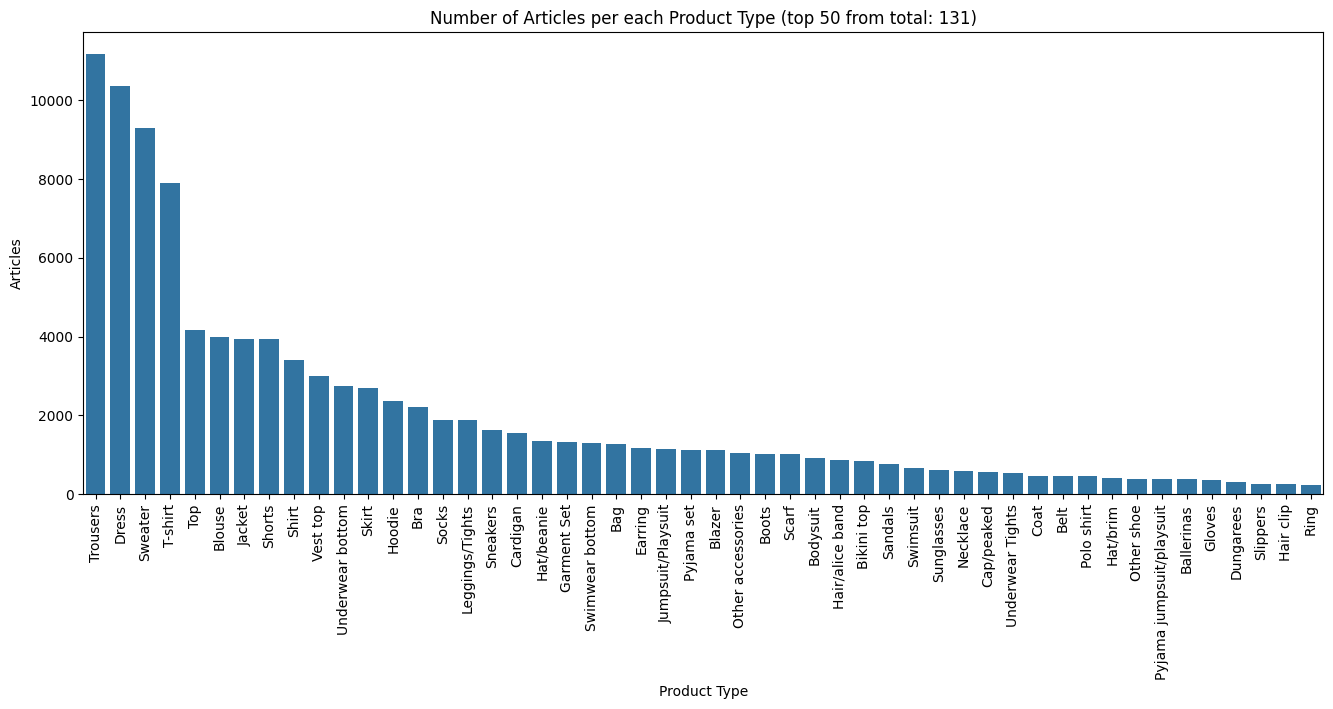

In [43]:
temp = articles_df.groupby(["product_type_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Type': temp.index,
                   'Articles': temp.values
                  })
total_types = len(df['Product Type'].unique())
df = df.sort_values(['Articles'], ascending=False)[0:50]
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Product Type (top 50 from total: {total_types})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\2019169406.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


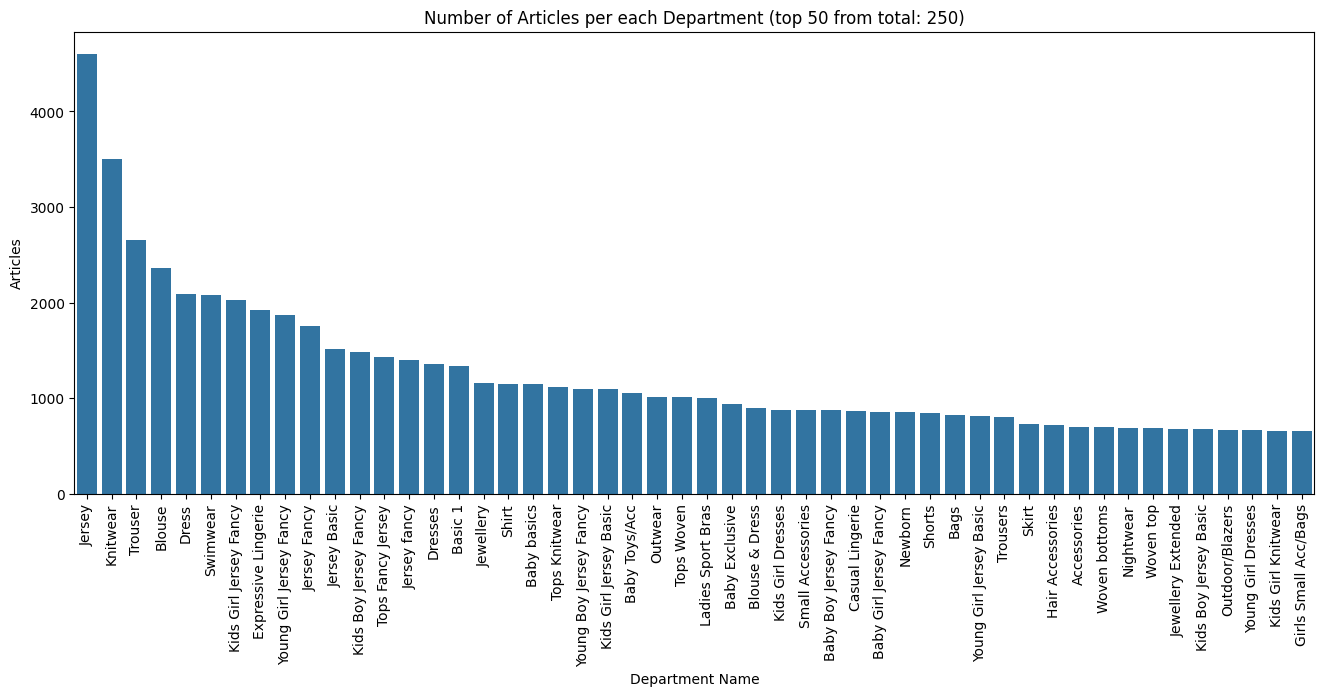

In [44]:
temp = articles_df.groupby(["department_name"])["article_id"].nunique()
df = pd.DataFrame({'Department Name': temp.index,
                   'Articles': temp.values
                  })
total_depts = len(df['Department Name'].unique())
df = df.sort_values(['Articles'], ascending=False).head(50)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Department (top 50 from total: {total_depts})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Department Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\797861127.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


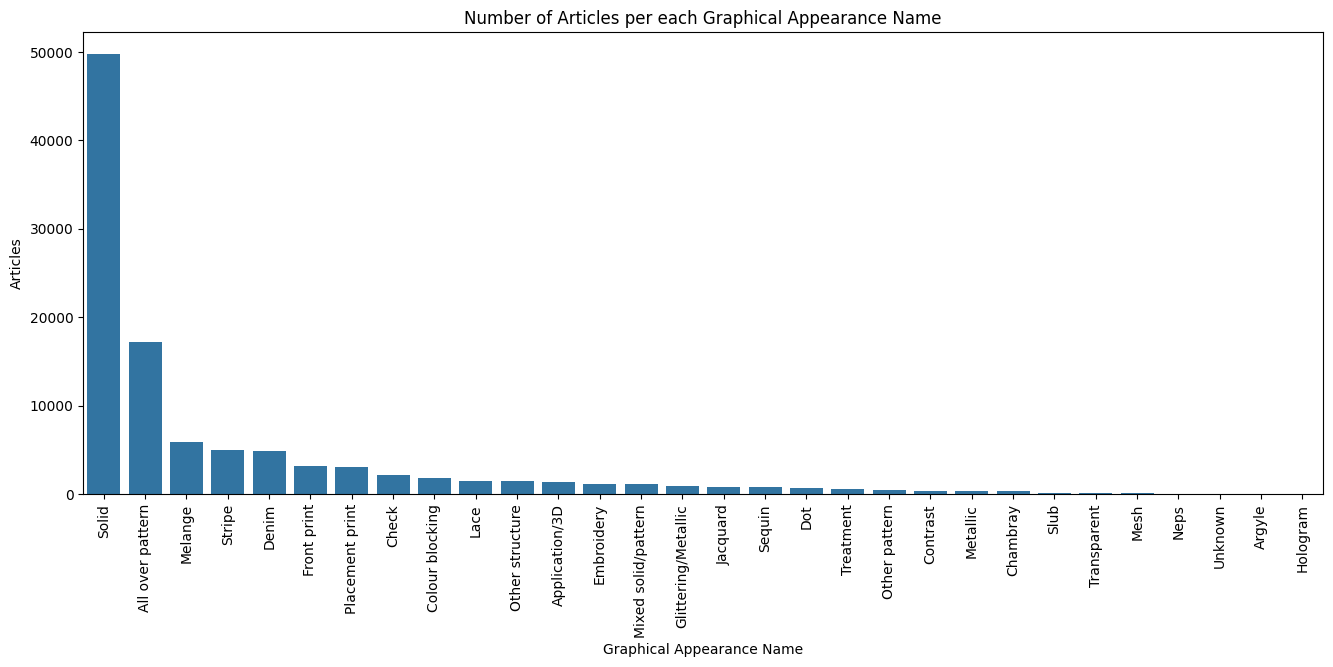

In [45]:
temp = articles_df.groupby(["graphical_appearance_name"])["article_id"].nunique()
df = pd.DataFrame({'Graphical Appearance Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False).head(50)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Graphical Appearance Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Graphical Appearance Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\3083941412.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


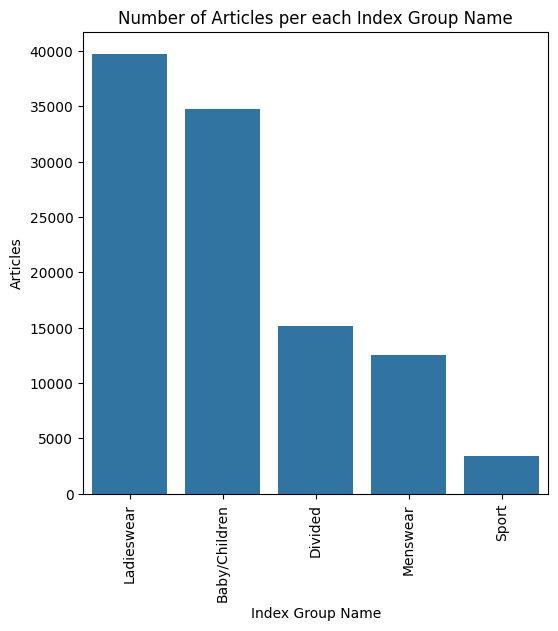

In [46]:
temp = articles_df.groupby(["index_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Articles per each Index Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\1853462815.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


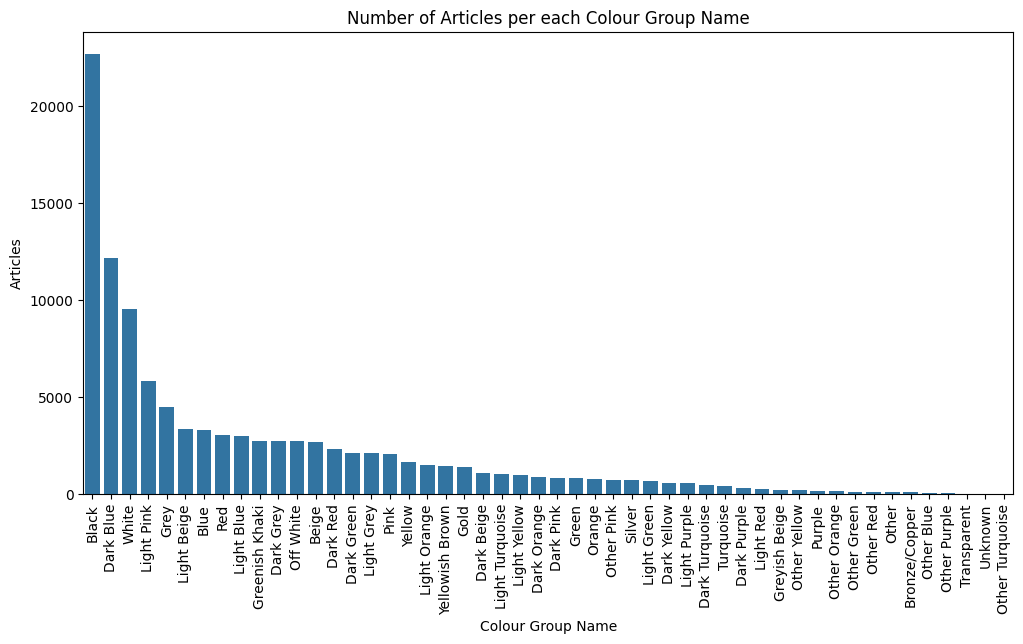

In [47]:
temp = articles_df.groupby(["colour_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Colour Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Colour Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Colour Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\1099141870.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


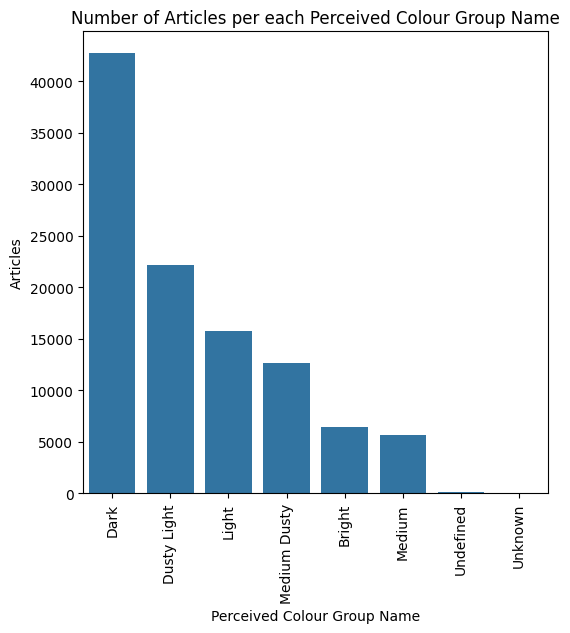

In [48]:
temp = articles_df.groupby(["perceived_colour_value_name"])["article_id"].nunique()
df = pd.DataFrame({'Perceived Colour Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Articles per each Perceived Colour Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Perceived Colour Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\876449178.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


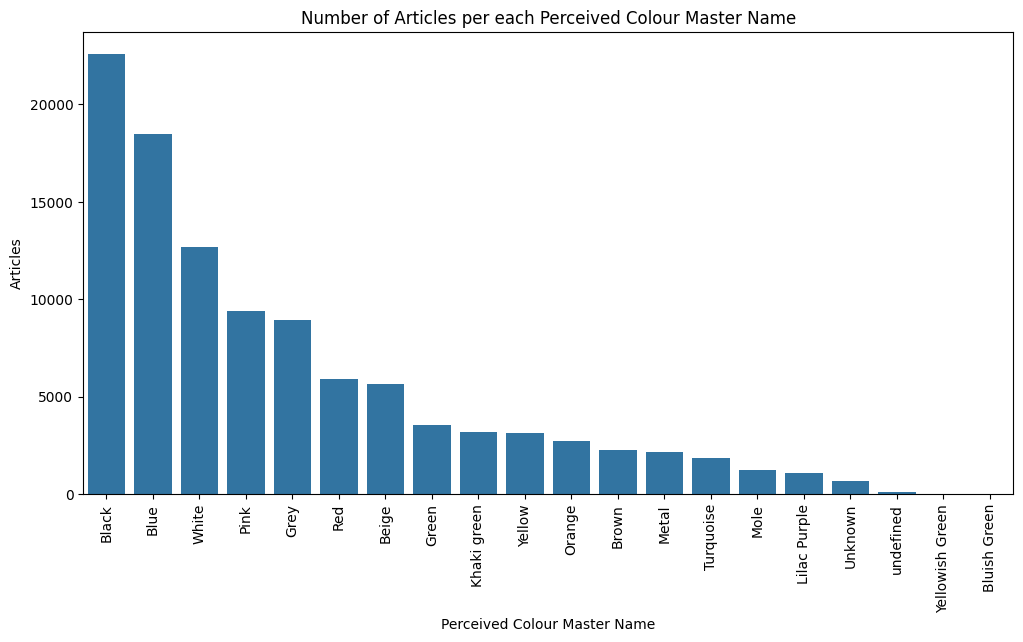

In [49]:
temp = articles_df.groupby(["perceived_colour_master_name"])["article_id"].nunique()
df = pd.DataFrame({'Perceived Colour Master Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Perceived Colour Master Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Perceived Colour Master Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\4036839095.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


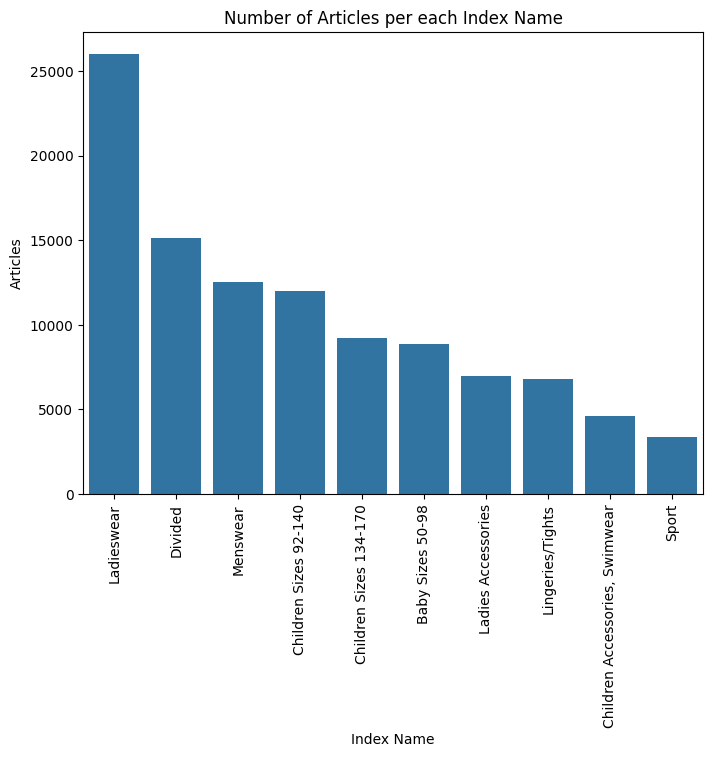

In [50]:
temp = articles_df.groupby(["index_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title(f'Number of Articles per each Index Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\3588791147.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


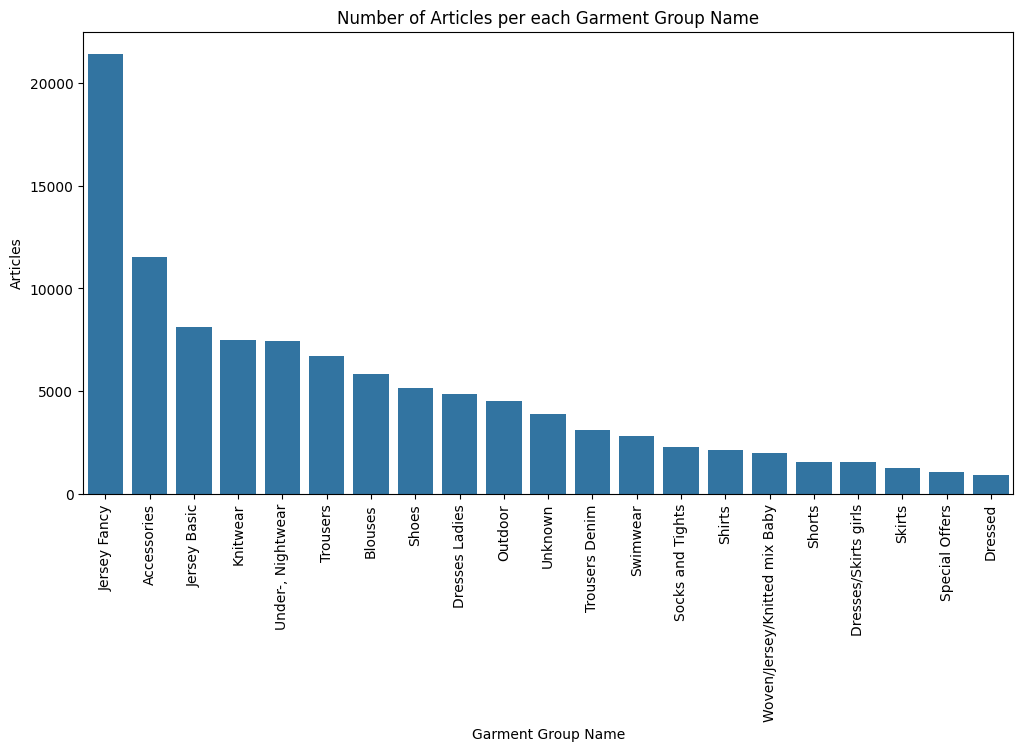

In [51]:
temp = articles_df.groupby(["garment_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Garment Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Garment Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Garment Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\1700801724.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


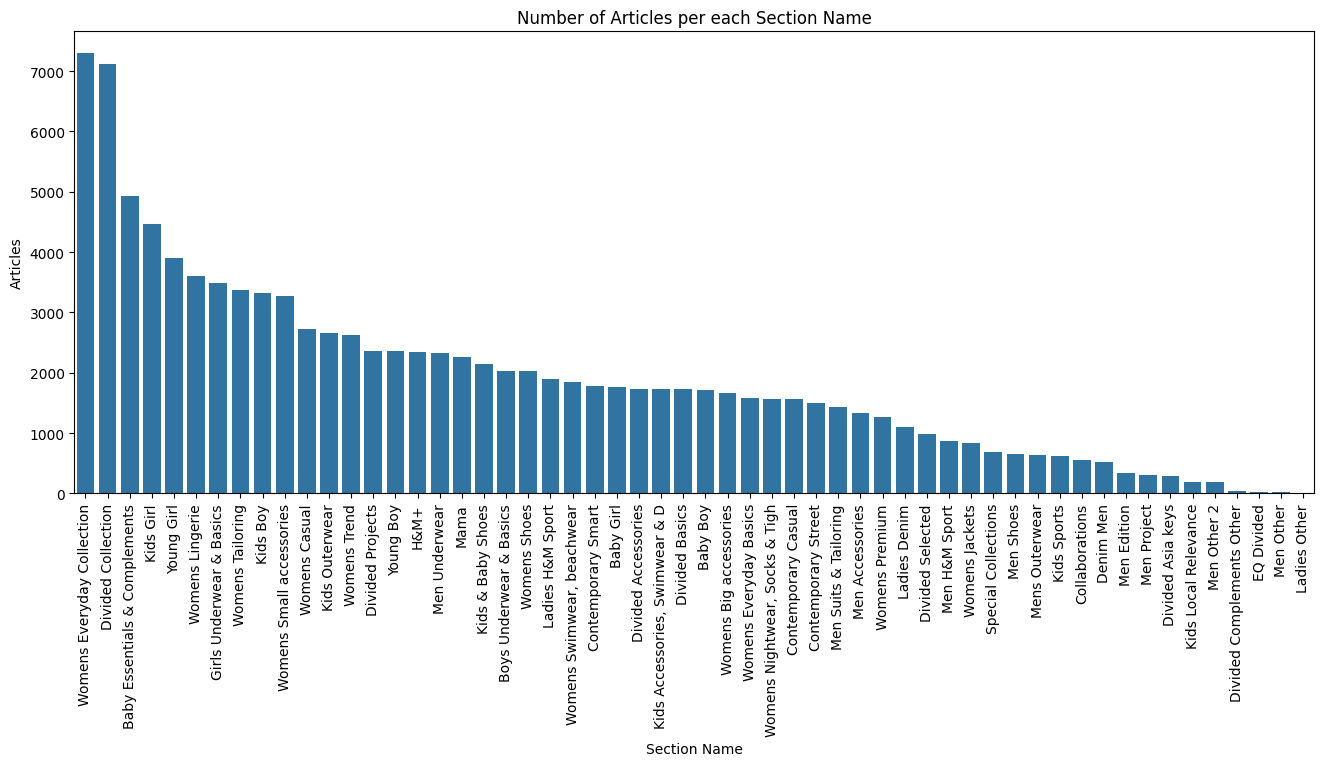

In [52]:
temp = articles_df.groupby(["section_name"])["article_id"].nunique()
df = pd.DataFrame({'Section Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Section Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Section Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\1700801724.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


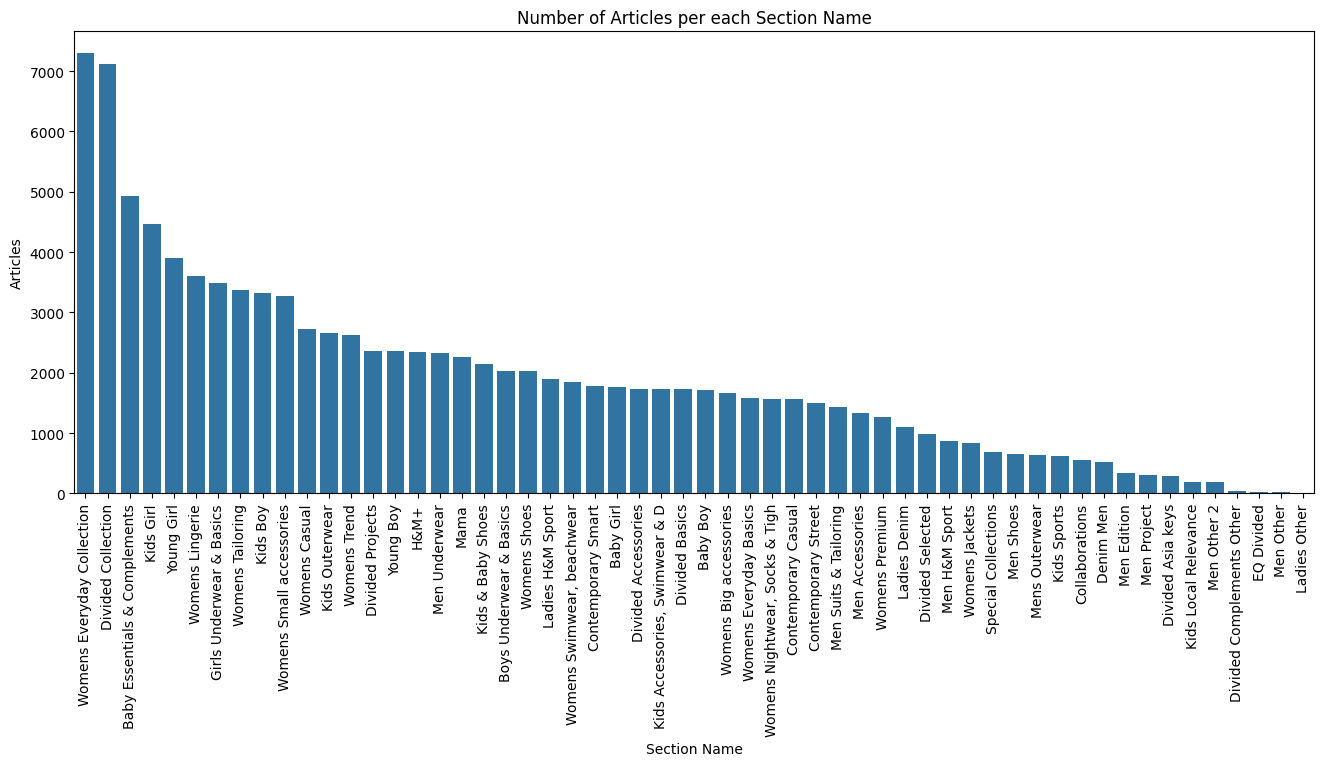

In [53]:
temp = articles_df.groupby(["section_name"])["article_id"].nunique()
df = pd.DataFrame({'Section Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Section Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Section Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

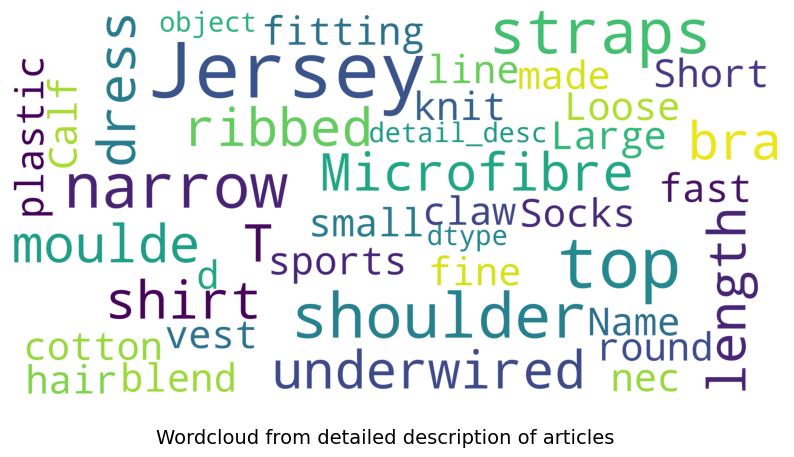

In [54]:
show_wordcloud(articles_df["detail_desc"], "Wordcloud from detailed description of articles")

# Customers data

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\1492221993.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


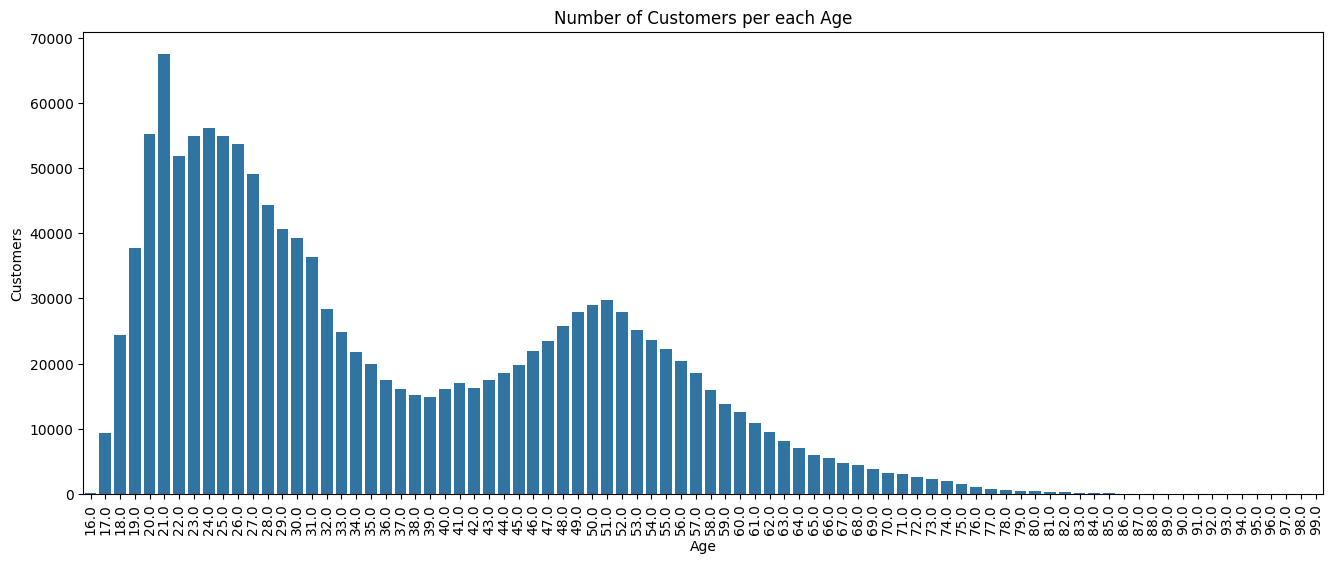

In [55]:
temp = customers_df.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({'Age': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Age'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Customers per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\511254272.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


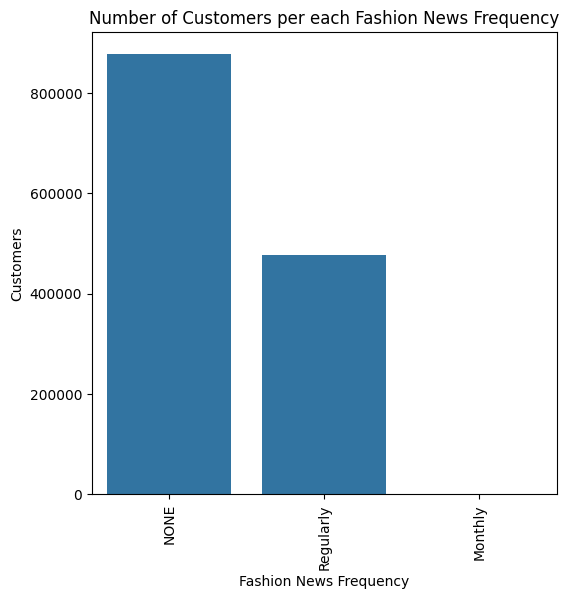

In [56]:
temp = customers_df.groupby(["fashion_news_frequency"])["customer_id"].count()
df = pd.DataFrame({'Fashion News Frequency': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Fashion News Frequency')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Fashion News Frequency', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

C:\Users\gargv\AppData\Local\Temp\ipykernel_11852\2701674828.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


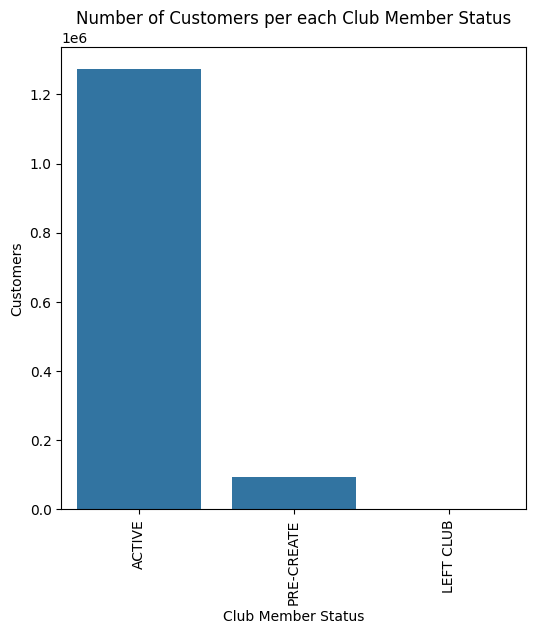

In [57]:
temp = customers_df.groupby(["club_member_status"])["customer_id"].count()
df = pd.DataFrame({'Club Member Status': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Club Member Status')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Club Member Status', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

# Transactions data

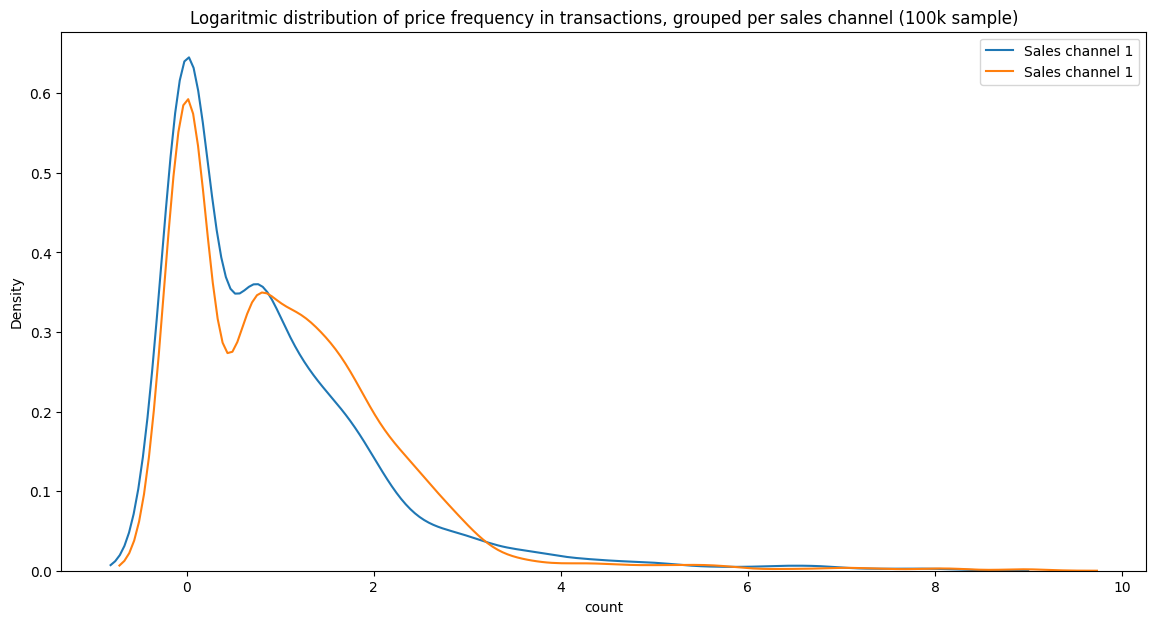

In [58]:
df = transactions_train_df.sample(100_000)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==1].price.value_counts()))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==2].price.value_counts()))
ax.legend(labels=['Sales channel 1', 'Sales channel 1'])
plt.title("Logaritmic distribution of price frequency in transactions, grouped per sales channel (100k sample)")
plt.show()

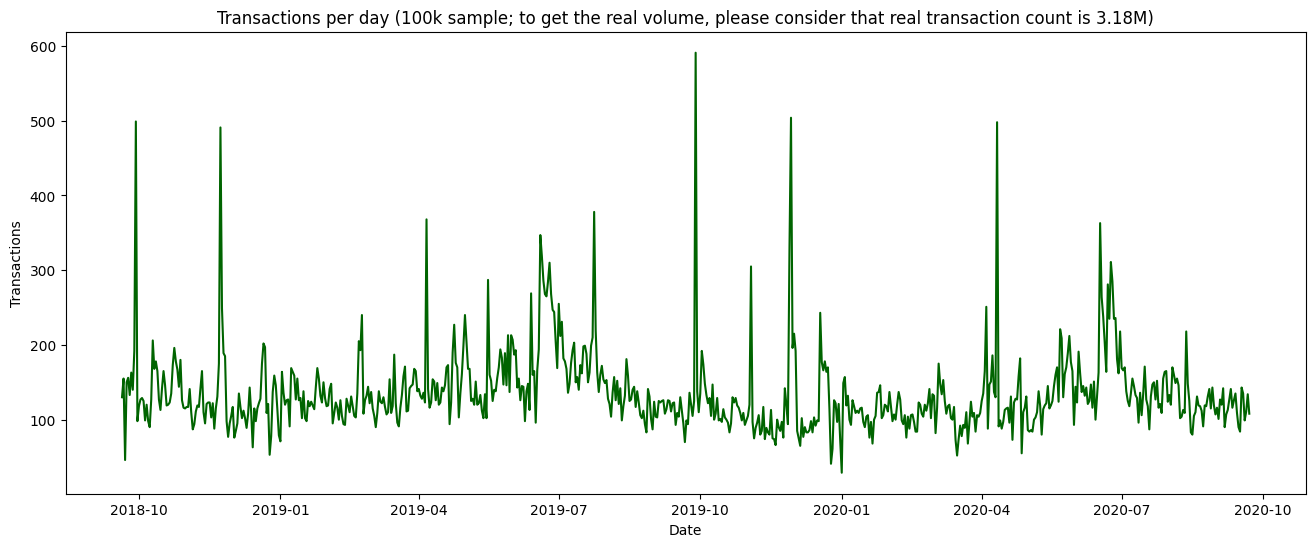

In [59]:
df = transactions_train_df.sample(100_000).groupby(["t_dat"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(df["Date"], df["Transactions"], color="Darkgreen")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title(f"Transactions per day (100k sample; to get the real volume, please consider that real transaction count is {round(transactions_train_df.shape[0]/10.e6,2)}M)")
plt.show()

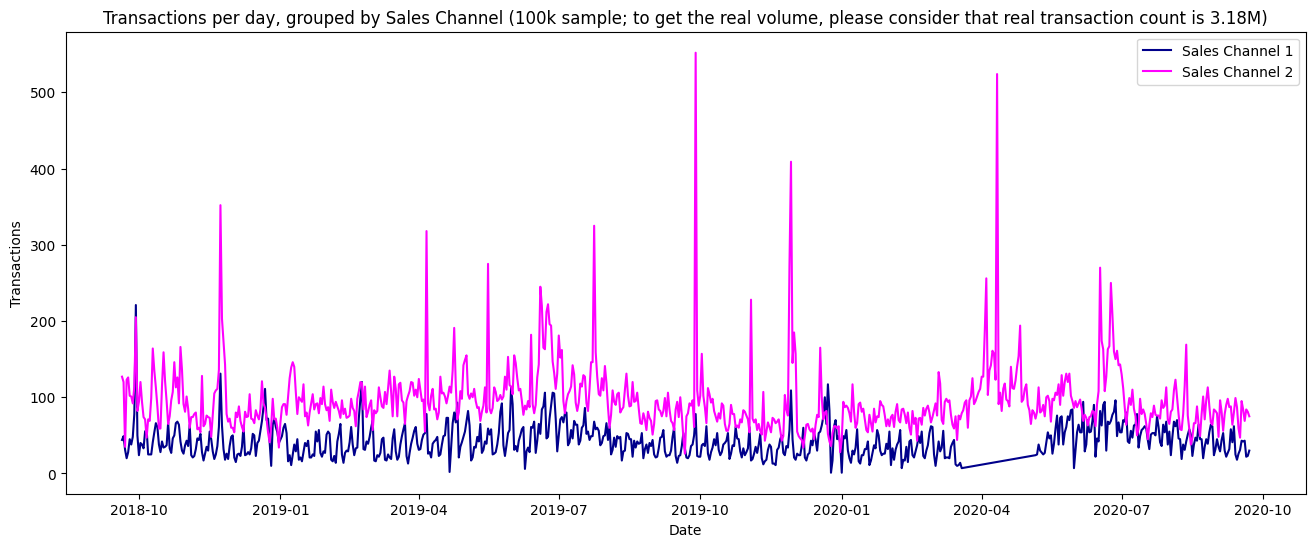

In [60]:
df = transactions_train_df.sample(100_000).groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Sales Channel Id", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df.loc[df["Sales Channel Id"]==1, "Date"], df.loc[df["Sales Channel Id"]==1, "Transactions"], label="Sales Channel 1", color="Darkblue")
g2 = ax.plot(df.loc[df["Sales Channel Id"]==2, "Date"], df.loc[df["Sales Channel Id"]==2, "Transactions"], label="Sales Channel 2", color="Magenta")
plt.xlabel("Date")
plt.ylabel("Transactions")
ax.legend()
plt.title(f"Transactions per day, grouped by Sales Channel (100k sample; to get the real volume, please consider that real transaction count is {round(transactions_train_df.shape[0]/10.e6,2)}M)")
plt.show()

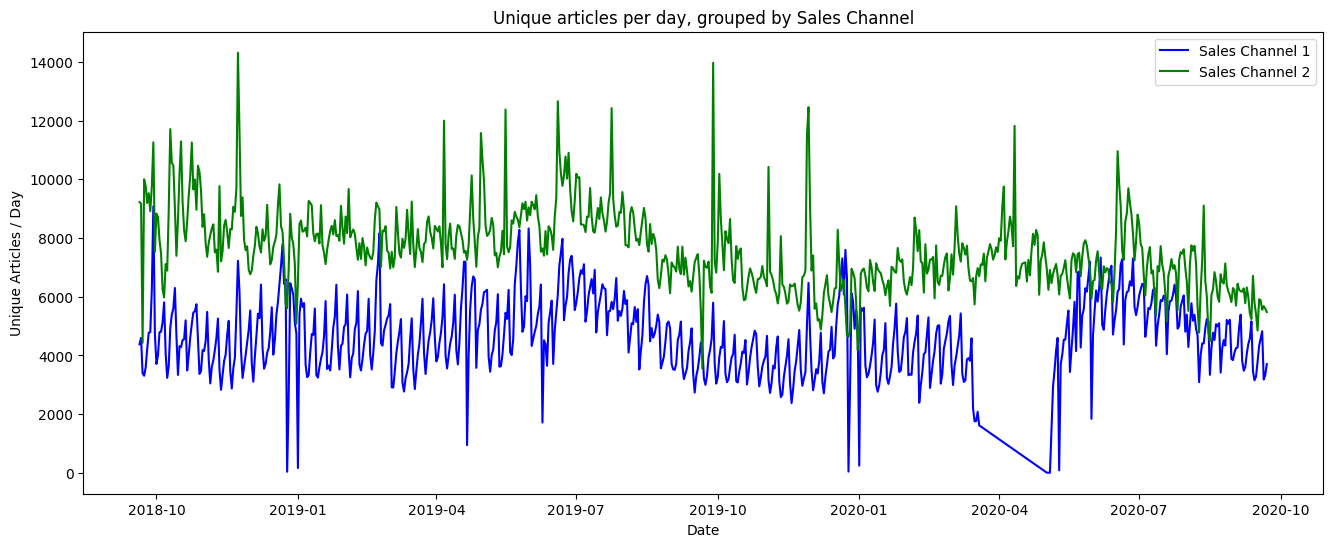

In [61]:
df = transactions_train_df.groupby(["t_dat", "sales_channel_id"])["article_id"].nunique().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Sales Channel Id", "Unique Articles"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df.loc[df["Sales Channel Id"]==1, "Date"], df.loc[df["Sales Channel Id"]==1, "Unique Articles"], label="Sales Channel 1", color="Blue")
g2 = ax.plot(df.loc[df["Sales Channel Id"]==2, "Date"], df.loc[df["Sales Channel Id"]==2, "Unique Articles"], label="Sales Channel 2", color="Green")
plt.xlabel("Date")
plt.ylabel("Unique Articles / Day")
ax.legend()
plt.title(f"Unique articles per day, grouped by Sales Channel")
plt.show()

# Image data

<img src="https://images.unsplash.com/photo-1575729312527-1bdecaae271e?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=687&q=80" width=400></img>

There are 105542 articles and 105100 different images. Let's check first which articles does not have corresponding images.

The `article_id` corresponds to digits from 2nd to the last of the image name. 
The digits from 2nd to 7th of image name  correspond to product code (`product_code`). 

In [63]:
# Assuming `image_name` starts with a non-numeric character and the rest is numeric
image_name_df = pd.DataFrame(images_names, columns=["image_name"])

# Safely convert the substring to an integer, handling any errors
def extract_article_id(x):
    try:
        # Remove the first character and convert the rest to integer
        return int(x[1:])
    except ValueError:
        # Return NaN or some default value if conversion fails
        return None

image_name_df["article_id"] = image_name_df["image_name"].apply(extract_article_id)

# Check if any conversion failed
image_name_df.dropna(subset=["article_id"], inplace=True)


In [64]:
image_name_df.head()

image_name   article_id
2  0108775015  108775015.0
3  0108775044  108775044.0
4  0108775051  108775051.0
5  0110065001  110065001.0
6  0110065002  110065002.0

In [65]:
image_article_df = articles_df[["article_id", "product_code", "product_group_name", "product_type_name"]].merge(image_name_df, on=["article_id"], how="left")
print(image_article_df.shape)
image_article_df.head()

(105542, 5)


article_id  product_code  product_group_name product_type_name  image_name
0   108775015        108775  Garment Upper body          Vest top  0108775015
1   108775044        108775  Garment Upper body          Vest top  0108775044
2   108775051        108775  Garment Upper body          Vest top  0108775051
3   110065001        110065           Underwear               Bra  0110065001
4   110065002        110065           Underwear               Bra  0110065002

In [66]:
article_no_image_df = image_article_df.loc[image_article_df.image_name.isna()]
print(article_no_image_df.shape)
article_no_image_df.head()

(442, 5)


article_id  product_code  product_group_name         product_type_name  \
88    174057028        174057           Nightwear  Pyjama jumpsuit/playsuit   
117   179208001        179208  Garment Lower body           Leggings/Tights   
258   212042043        212042               Shoes                  Sneakers   
259   212042066        212042               Shoes                  Sneakers   
261   212629004        212629   Garment Full body                     Dress   

    image_name  
88         NaN  
117        NaN  
258        NaN  
259        NaN  
261        NaN

In [67]:
print("Product codes with some missing images: ", article_no_image_df.product_code.nunique())
print("Product groups with some missing images: ", list(article_no_image_df.product_group_name.unique()))

Product codes with some missing images:  372
Product groups with some missing images:  ['Nightwear', 'Garment Lower body', 'Shoes', 'Garment Full body', 'Accessories', 'Garment Upper body', 'Underwear', 'Socks & Tights', 'Swimwear', 'Cosmetic']


Let's visualize few images.

In [73]:
def plot_image_samples(image_article_df, product_group_name, cols=1, rows=-1):
    image_path = "./images/"
    _df = image_article_df.loc[image_article_df.product_group_name==product_group_name]
    article_ids = _df.article_id.values[0:cols*rows]
    plt.figure(figsize=(2 + 3 * cols, 2 + 4 * rows))
    for i in range(cols * rows):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(f"{product_group_name} {article_id[:3]}\n{article_id}.jpg")
        image = Image.open(f"{image_path}{article_id[:3]}/{article_id}.jpg")
        plt.imshow(image)

In [74]:
print(image_article_df.product_group_name.unique())

['Garment Upper body' 'Underwear' 'Socks & Tights' 'Garment Lower body'
 'Accessories' 'Items' 'Nightwear' 'Unknown' 'Underwear/nightwear' 'Shoes'
 'Swimwear' 'Garment Full body' 'Cosmetic' 'Interior textile' 'Bags'
 'Furniture' 'Garment and Shoe care' 'Fun' 'Stationery']


In [57]:
# We will represent images grouped on product group name.

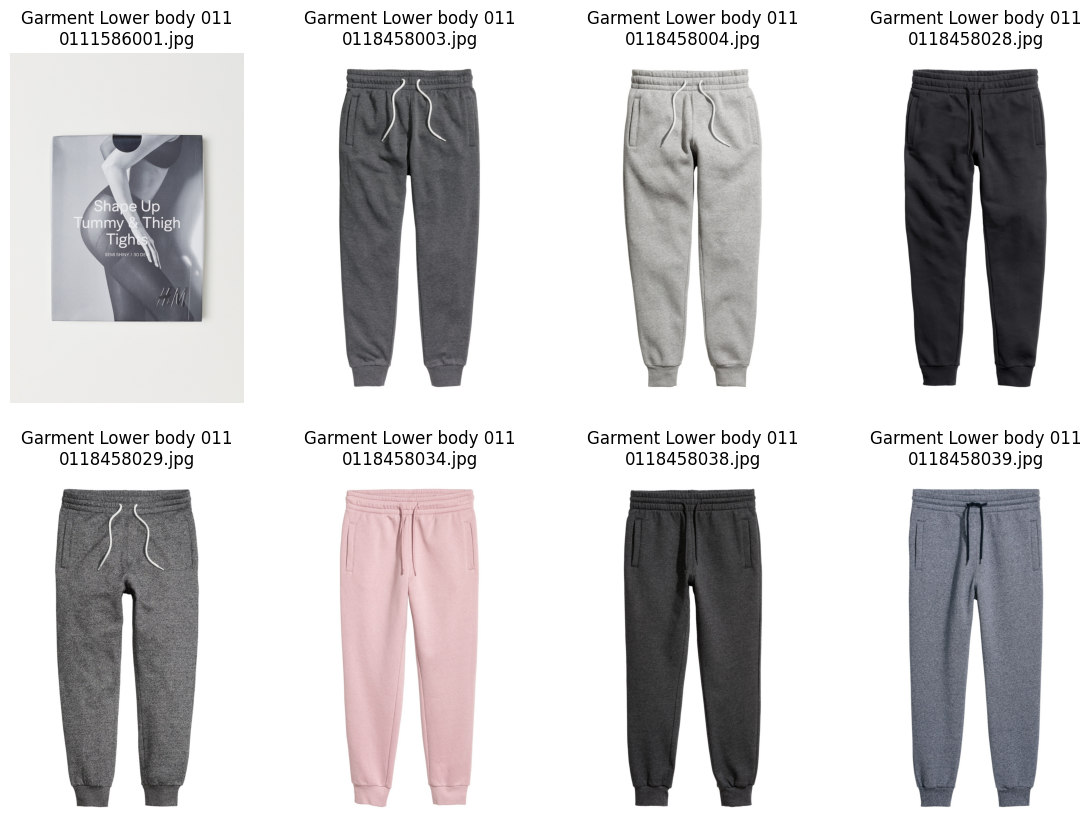

In [76]:
plot_image_samples(image_article_df, "Garment Lower body", 4, 2)

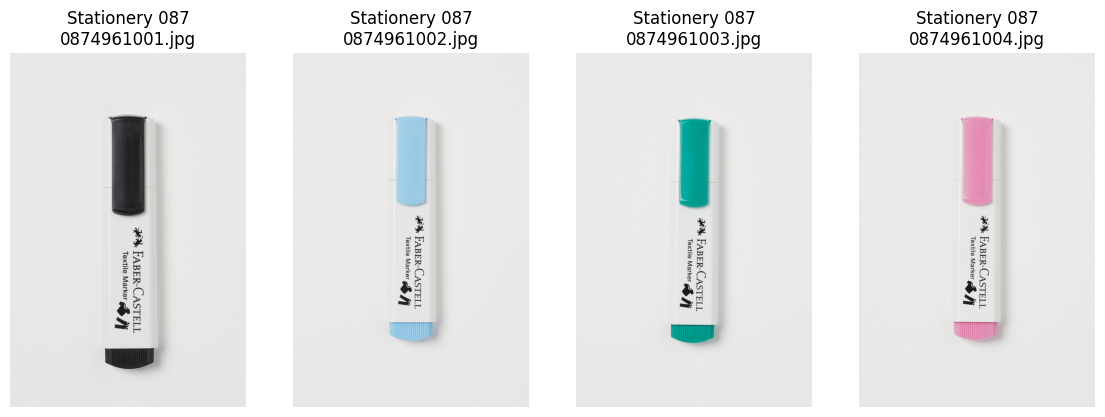

In [77]:
plot_image_samples(image_article_df, "Stationery", 4, 1)

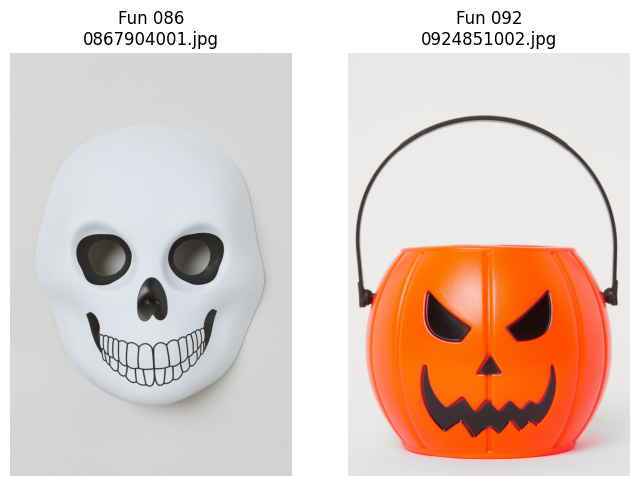

In [78]:
plot_image_samples(image_article_df, "", 2, 1)

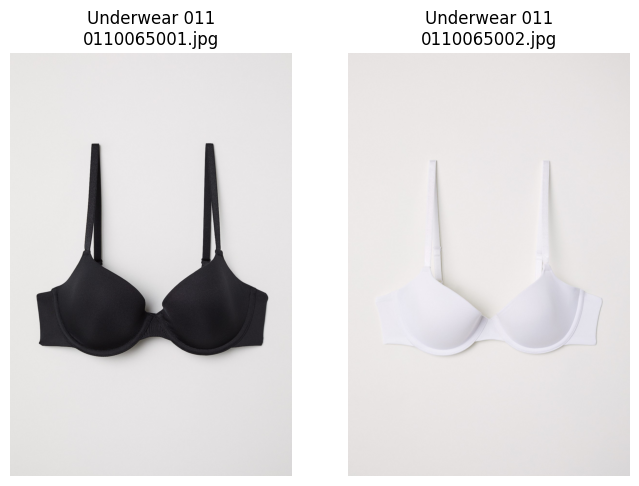

In [79]:
plot_image_samples(image_article_df, "Underwear", 2, 1)

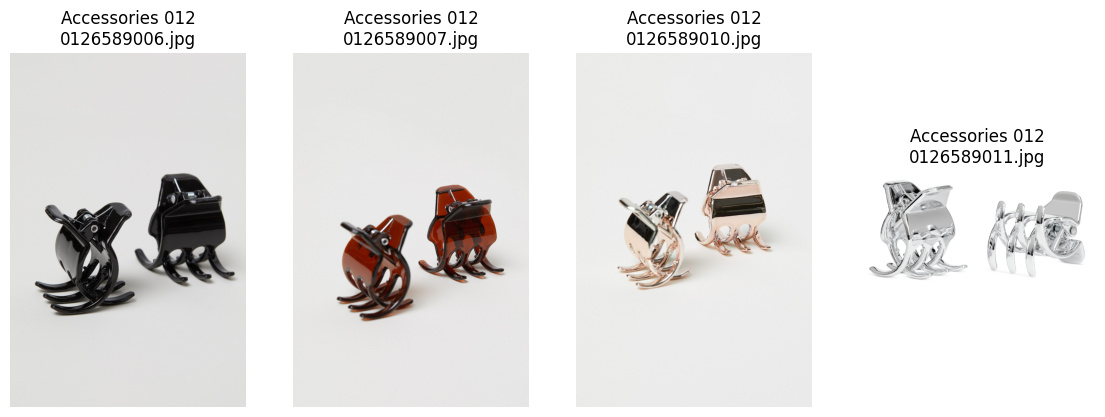

In [80]:
plot_image_samples(image_article_df, "Accessories", 4, 1)

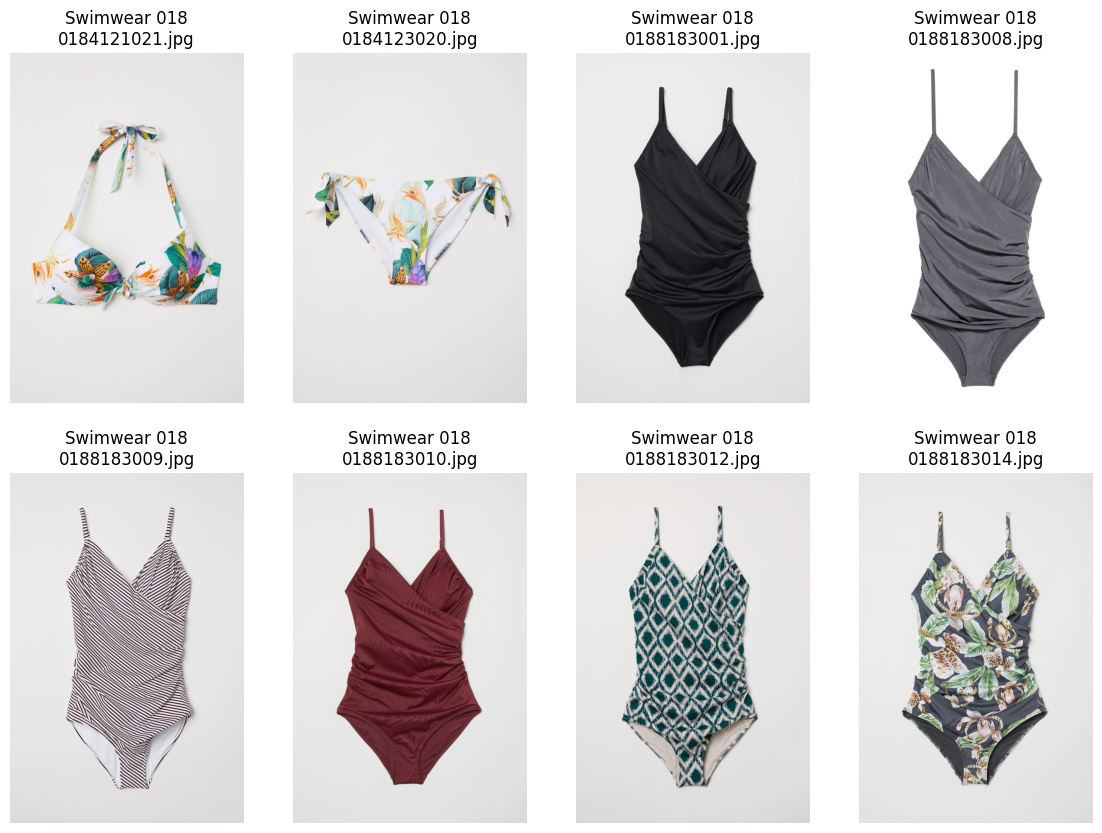

In [81]:
plot_image_samples(image_article_df, "Swimwear", 4, 2)

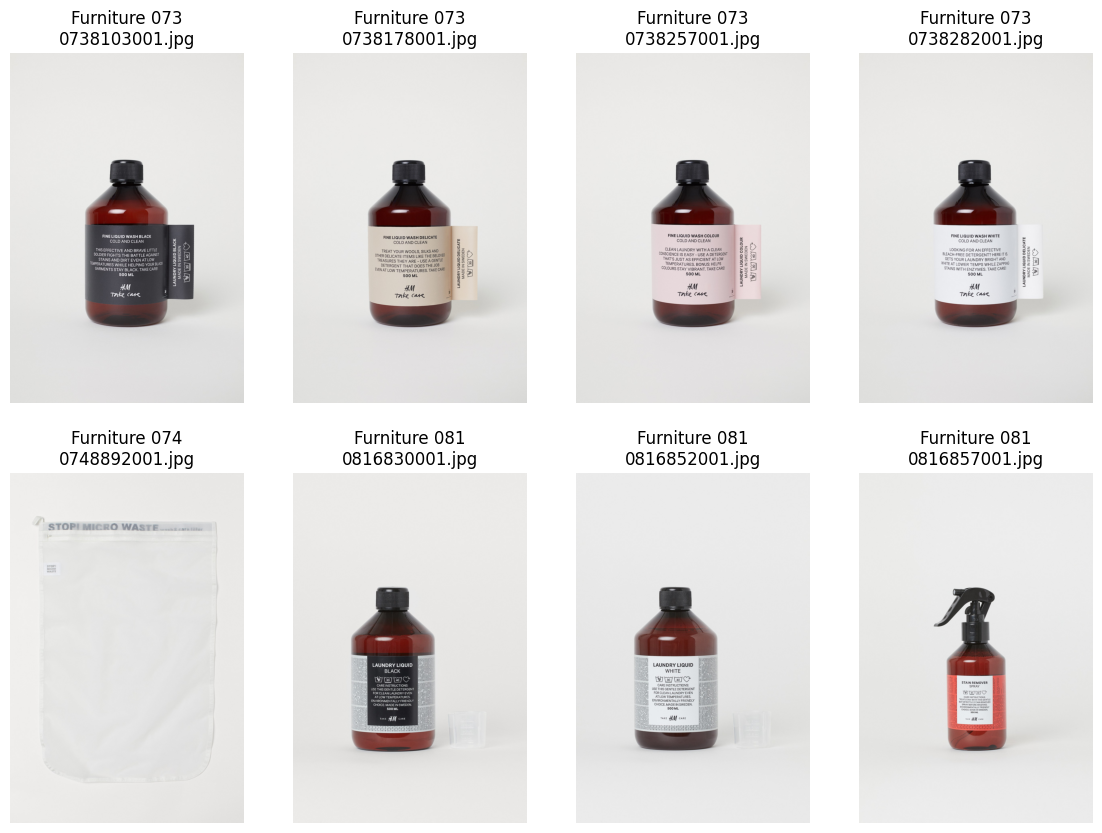

In [82]:
plot_image_samples(image_article_df, "Furniture", 4, 2)

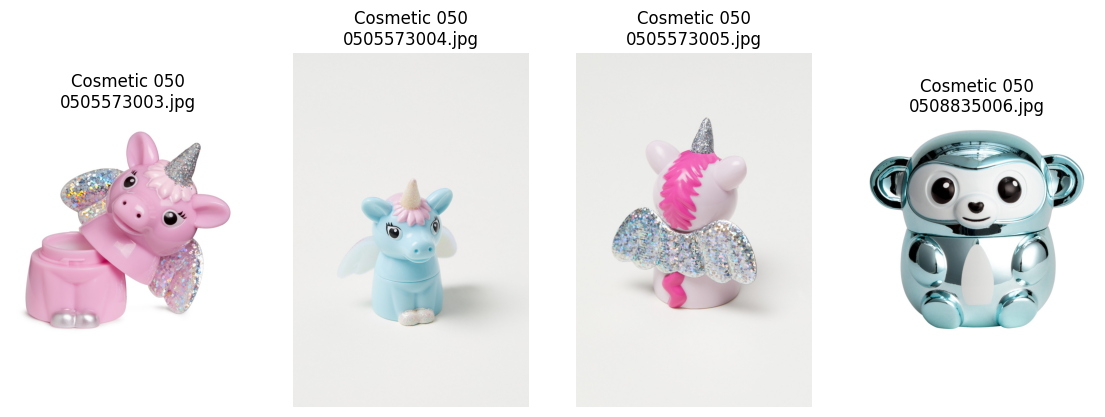

In [83]:
plot_image_samples(image_article_df, "Cosmetic", 4, 1)

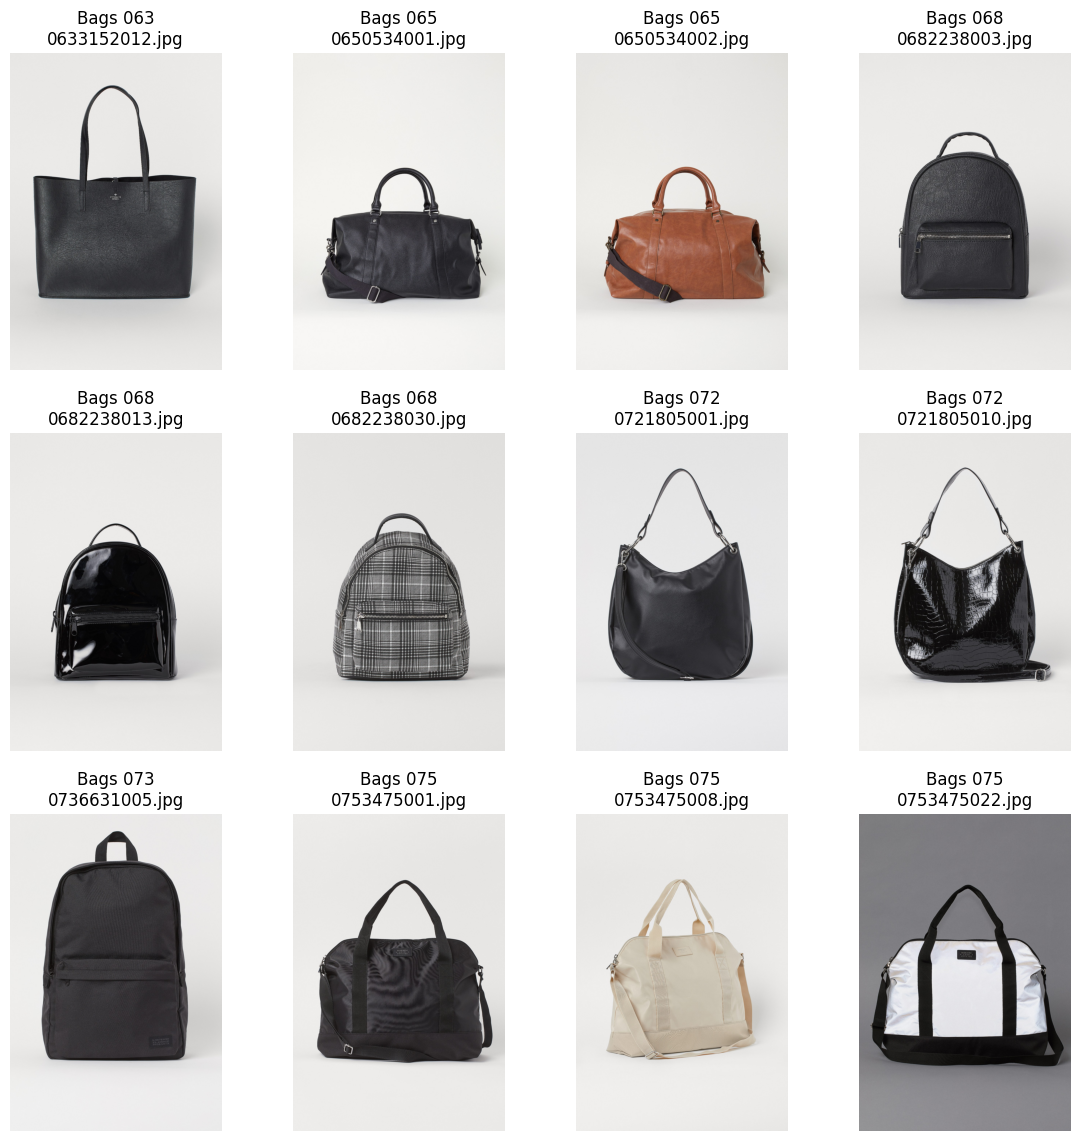

In [84]:
plot_image_samples(image_article_df, "Bags", 4, 3)

# Initial submission


<img src="https://images.unsplash.com/photo-1533120164489-96c6ca1f43eb?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=764&q=80" width=400></img>

Let's prepare a very basic initial submission.

For this initial submission, we apply the following simplified logic:
- if there are articles for a certain client, pick the most recent buys;  
- if there are not articles for a certain client, just pick the most frequently buyed articles.

In [85]:
transactions_train_df = transactions_train_df.sort_values(["customer_id", "t_dat"], ascending=False)


In [86]:
transactions_train_df.head()

t_dat                                        customer_id  \
19867243  2019-12-04  ffffd9ac14e89946416d80e791d064701994755c3ab686...   
27806865  2020-06-22  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...   
25077914  2020-04-25  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...   
24375394  2020-04-09  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...   
24375395  2020-04-09  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...   

          article_id     price  sales_channel_id  
19867243   806050001  0.084729                 2  
27806865   882810001  0.016932                 1  
25077914   866755002  0.050831                 2  
24375394   866755002  0.043203                 2  
24375395   840360003  0.013542                 2

In [87]:
last_date = transactions_train_df.t_dat.max()
print(last_date)
print(transactions_train_df.loc[transactions_train_df.t_dat==last_date].shape)

2020-09-22
(32866, 5)


In [88]:
most_frequent_articles = list(transactions_train_df.loc[transactions_train_df.t_dat==last_date].article_id.value_counts()[0:12].index)
art_list = []
for art in most_frequent_articles:
    art = "0"+str(art)
    art_list.append(art)
art_str = " ".join(art_list)
print("Frequent articles bought recently: ", art_str)

Frequent articles bought recently:  0924243002 0751471001 0448509014 0918522001 0866731001 0714790020 0788575004 0915529005 0573085028 0918292001 0850917001 0928206001


In [89]:
agg_df = transactions_train_df.groupby(["customer_id"])["article_id"].agg(lambda x: str(x.values[0:12])[1:-1]).reset_index()

In [90]:
def padding_articles(x):
    if x:
        xl = x.split()
        x = []
        for xi in xl:
            x.append("0"+xi)
        dimm_x = len(x)
        if dimm_x < 12:
            x.extend(art_list[:12-dimm_x])
        return(" ".join(x))

In [91]:
agg_df["article_id"] = agg_df["article_id"].apply(lambda x: padding_articles(x))

In [92]:
print("Aggregated transaction history: ", agg_df.customer_id.nunique())
print("Submission sample: ", sample_submission_df.customer_id.nunique())

Aggregated transaction history:  1362281
Submission sample:  1371980


In [97]:
print(sample_submission_df.shape)
sample_submission_df.head()

(1371980, 2)


customer_id  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   

                                          prediction  
0  0706016001 0706016002 0372860001 0610776002 07...  
1  0706016001 0706016002 0372860001 0610776002 07...  
2  0706016001 0706016002 0372860001 0610776002 07...  
3  0706016001 0706016002 0372860001 0610776002 07...  
4  0706016001 0706016002 0372860001 0610776002 07...

In [98]:
submission_df = agg_df.merge(sample_submission_df[["customer_id"]], how="right")
submission_df.columns = ["customer_id", "prediction"]
print(submission_df.shape)
submission_df.head()

(1371980, 2)


customer_id  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   

                                          prediction  
0  0568601043 0841260003 0887593002 0890498002 07...  
1  0826211002 0599580055 0599580055 0811835004 08...  
2  0794321007 0858883002 0851400006 0750424014 07...  
3  0742079001 0732413001 0924243002 0751471001 04...  
4  0896152002 0730683050 0927530004 0791587015 05...

In [94]:
print("Rows with missing data in submission: ", submission_df.loc[submission_df.prediction.isna()].shape[0])

Rows with missing data in submission:  9699


In [99]:
submission_df.loc[submission_df.prediction.isna(), ["prediction"]] = art_str

In [100]:
print("Rows with missing data in submission: ", submission_df.loc[submission_df.prediction.isna()].shape[0])

Rows with missing data in submission:  0


In [105]:
submission_df.to_csv("submission.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\gargv\\Downloads\\h-and-m-personalized-fashion-recommendations\\images\\017\\0174057028.jpg'

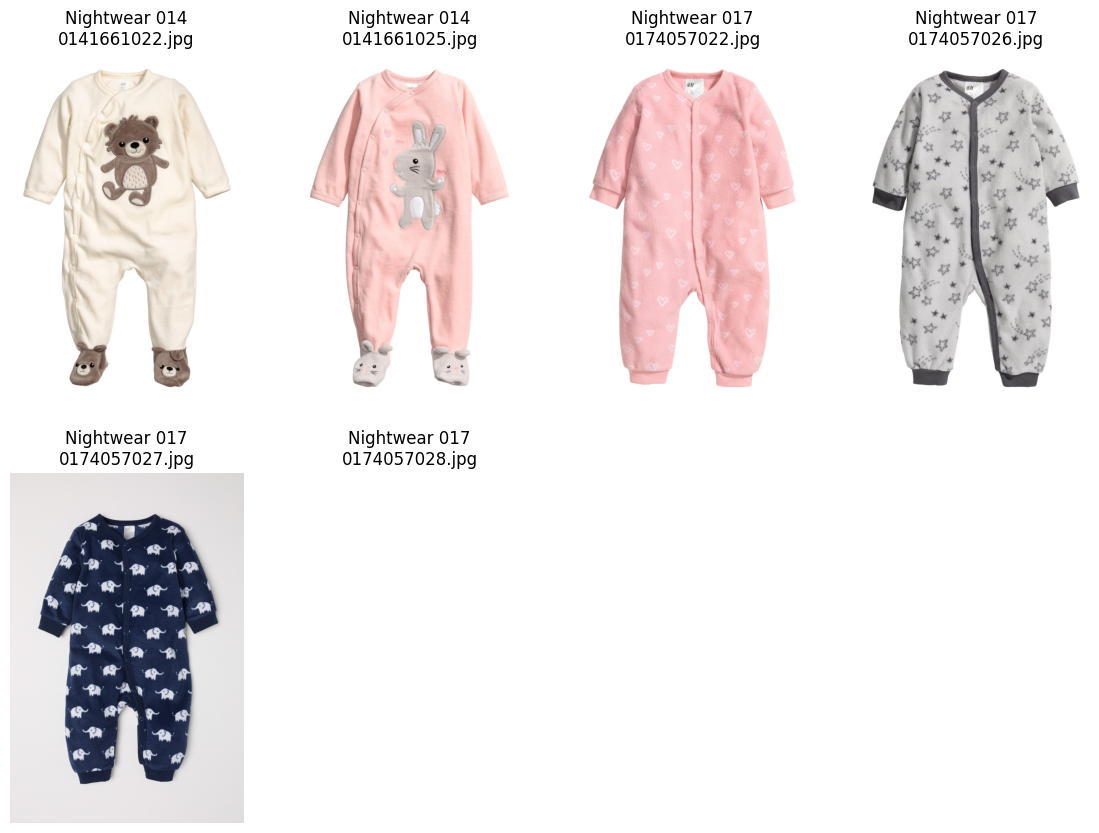

In [104]:
plot_image_samples(image_article_df, "Nightwear", 4, 2)